In [40]:
from utils import get_sample_config
orp, recp, sample_rate, min5, item = get_sample_config()

# ppg, ecg
from dataset import get_vital
ppg_or, ecg_or   = get_vital(orp, type_='or',sample_rate=sample_rate, duration=min5)
ppg_rec, ecg_rec = get_vital(recp, type_='rec',sample_rate=sample_rate, duration=min5)

In [41]:
from preprocess import interpolate, bandpass, moving_average, norm_z

def ppg_pre(x,sample_rate=300):
    x = interpolate(x)
    x = bandpass(x, band=[0.5,10],sample_rate=sample_rate)
    x = moving_average(x,w=30)
    x = norm_z(x)
    return x

## PPG 

#### interpolate 

In [42]:
from preprocess import interpolate  
ppg_or0 = interpolate(ppg_or)
ppg_rec0 = interpolate(ppg_rec)

### 1. bandpass

In [43]:
from preprocess import bandpass
ppg_or1  = bandpass(ppg_or0, band=[0.5,10],sample_rate=sample_rate)
ppg_rec1 = bandpass(ppg_rec0,band=[0.5,10],sample_rate=sample_rate)

### 2. moving average 

In [44]:
from preprocess import moving_average as ma
ppg_or2 = ma(ppg_or1,w=30)
ppg_rec2 = ma(ppg_rec1,w=30)

In [135]:
ppg_or2 = signal.resample(ppg_or2,90000)
ppg_rec2 = signal.resample(ppg_rec2,90000)

### 3. z-score 

In [45]:
from preprocess import norm_z
ppg_or3 = norm_z(ppg_or2)
ppg_rec3 = norm_z(ppg_rec2)

## ECG 

In [21]:
import neurokit2 as nk

from preprocess import interpolate, bandpass, moving_average, norm_z

ecg_rec0 = interpolate(ecg_rec)
ecg_or0 = interpolate(ecg_or)

In [22]:
ecg_rec1 = nk.ecg_clean(ecg_rec0,sampling_rate=sample_rate)
ecg_or1 = nk.ecg_clean(ecg_or0,sampling_rate=sample_rate)

### sig2img spectrogram 

In [141]:
from matplotlib import pyplot as plt
import numpy as np
def draw_stft(f, t, Zxx,title='STFT Magnitude'):
    plt.figure(figsize=(12,5))
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=1, shading='gouraud')
    plt.title(title); plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]'); plt.ylim([0, 20]); plt.show()

In [137]:
from scipy import signal
f, t, xspec_or = signal.spectrogram(ppg_or2, fs=sample_rate,nperseg=300)
f, t, xspec_rec = signal.spectrogram(ppg_rec2, fs=sample_rate,nperseg=300)

fe,te, xspec_ecg_or = signal.spectrogram(ecg_or1*10, fs=sample_rate,nperseg=300)
fe,te, xspec_ecg_rec = signal.spectrogram(ecg_rec1*10, fs=sample_rate,nperseg=300)

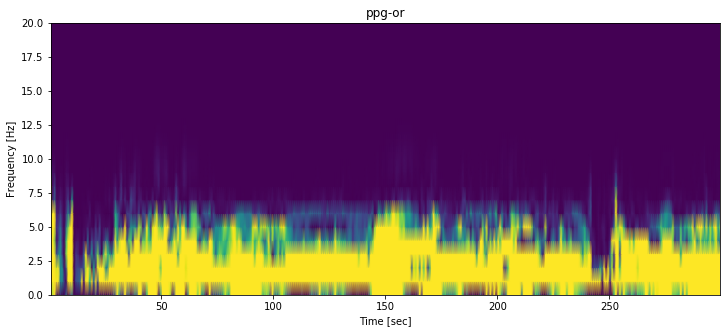

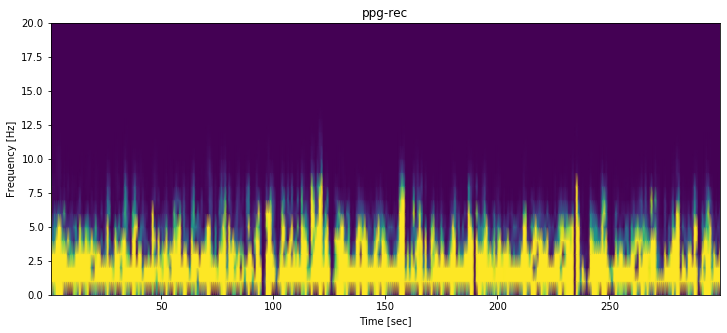

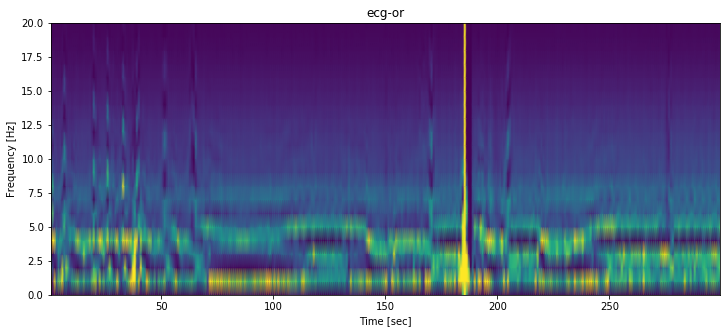

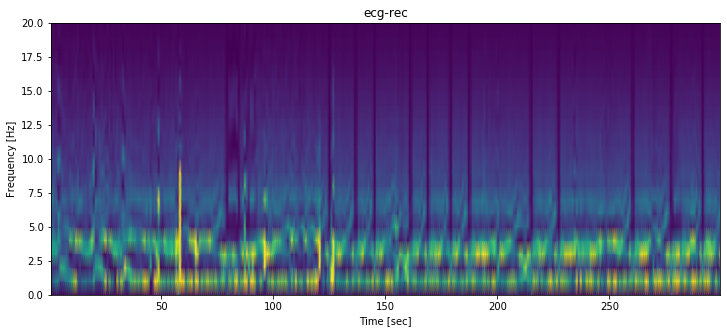

In [142]:
draw_stft(f, t, xspec_or,title='ppg-or')
draw_stft(f, t, xspec_rec,title='ppg-rec')
draw_stft(f, t, xspec_ecg_or,title='ecg-or')
draw_stft(f, t, xspec_ecg_rec,title='ecg-rec')
plt.show()